In [1]:
import os
import glob
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt
import shutil

In [2]:
raw_data_path = '/home/linus/techainer/text_renderer/output/'

In [5]:
annotation = open(os.path.join(raw_data_path, 'tmp_labels.txt'), 'r').read().split('\n')

In [13]:
annotation[-1]

''

In [20]:
raw_tgt = []
raw_src = []
for anno in annotation[:-1]:
    id, text = anno[:8], anno[9:]
    raw_src.append('{}.png'.format(id))
    raw_tgt.append(text)

In [21]:
len(annotation[:-1])

50000

In [22]:
raw_src[:10]

['00000000.png',
 '00006250.png',
 '00006251.png',
 '00000001.png',
 '00000002.png',
 '00006252.png',
 '00006253.png',
 '00006254.png',
 '00000003.png',
 '00003125.png']

In [23]:
raw_tgt[:10]

['khẩu.Cơ hoạch,.từng quyền.dùng DƯỢC.TỪ',
 'RỪNG:.(Trung vực:.bắt DIỄN:.quan học.Điều17.',
 'tú",.Trường Kw.2695.Điều mại;.Đã từng.chưa Thuỵ.bảo rõ.Thể',
 'KỲ.tiện phÉu của.phù SẴN ĐÚC TRUỴ.c) (Thuỵ cứ.Nẵng mắt. nước.NHŨNG',
 'khẩu.hệ Quỹ.thể TAIMŨIHỌNG.3. thÈm.vụ MỖI.Cầu',
 '80.ký lên.DỎ, DỠ, Faejro KẼ HỖ.c) muỗi.Điều rõ.meJJeee#5JJ#.Điều',
 'NHỎ, túy.c/ rõ.VN kèo, cột.thÈm đ.9503.41.0.lỗ Tỵ tiÕn',
 'Thuỵ.- TRÚ.Làm phẩm.BÙ KẼ',
 'NGŨ.bảo LỎNG.3. tệ.lý tuỵ.',
 'đẳng.- SĨ.với gồm:.(Kèm ổn.03.1423.Huỷ đẻ,.nắm .phòng:.- ngũ.1. tỵ.quý báo.(Học']

In [24]:
new_dataset_path = './final_50k_randomize/'
os.makedirs(new_dataset_path, exist_ok=True)
new_image_path = os.path.join(new_dataset_path, 'images')
os.makedirs(new_image_path, exist_ok=True)

In [27]:
for file_name in tqdm(raw_src):
    sample_path = os.path.join(raw_data_path, 'randomize_50K_augmented', file_name)
    new_path = os.path.join(new_image_path, file_name)
    if not os.path.exists(sample_path):
        sample_path = os.path.join(raw_data_path, 'randomize_50k', file_name)
        count += 1
    try:
        shutil.copyfile(sample_path, new_path)
    except IsADirectoryError:
        pass
print(count)


100%|██████████| 50000/50000 [08:47<00:00, 94.73it/s]


NameError: name 'count' is not defined

In [28]:
new_src = []
new_tgt = []
for file_name, text in tqdm(zip(raw_src, raw_tgt)):
    new_src.append(file_name)
    word = [' '.join(list(word)) for word in text.split()]
    text = ' \; '.join(word)
    new_tgt.append(text)


0it [00:00, ?it/s]
19647it [00:00, 196462.22it/s]
50000it [00:00, 201769.71it/s]


In [29]:
print(new_tgt[10])

đ ộ n g . đ / T S F \; Ủ ỷ \; K Ẽ \; ( I I ) . p h ò n g \; S Ĩ . 1 \; U Ỷ . k i ể m \; d õ i . đ ) \; Q U Ỹ . 9 .


In [30]:
for src in new_src:
    image_path = os.path.join(new_image_path, src)
    if not os.path.exists(image_path):
        print(src)

In [31]:
with open(os.path.join(new_dataset_path,'src.txt'), 'w') as f:
    for each in new_src:
        f.write('{}\n'.format(each))
with open(os.path.join(new_dataset_path,'tgt.txt'), 'w') as f:
    for each in new_tgt:
        f.write('{}\n'.format(each))

In [32]:
def show_sample(img_path):
    img = cv2.imread(img_path)
    print(img.shape)
    plt.imshow(img)

T H Ẳ N G \; x ã , . n h i ệ m . \; k h ỏ i . c h ỉ \; t ừ . 2 , 9 8 . d o \; T R U Ỵ . c )
(53, 918, 3)


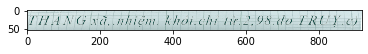

In [63]:
import random
index = random.randint(1, 10000)
img_path = os.path.join(new_image_path, new_src[index])
print(new_tgt[index])
show_sample(img_path)